# Mart Sales Prediction 

WorK_flow ----->  Data Preprocessing ---> EDA -----> Train_test_Split---->HyperParameter tuning -->XGBoost Regressor ---> Evaluation 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#### Data Collection and Analysis

In [5]:
big_mart_data = pd.read_csv(r"C:\Users\udayk\Downloads\Train.csv")

In [6]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
-   Outlet_Identifier
-    Outlet_Size
-   Outlet_Location_Type
-    Outlet_Type  

#### Handling missing values

In [10]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
big_mart_data['Item_Weight'] = big_mart_data['Item_Weight'].fillna( big_mart_data['Item_Weight'].mean())

In [12]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
# we cannot fill outlet_size directly will mode because there is different modes for different oulet types
# so we need to do it in anothere method 

In [14]:
mode_of_outlet_size = big_mart_data.pivot_table(values = 'Outlet_Size',columns = 'Outlet_Type', aggfunc=(lambda X:X.mode()[0]))

In [15]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [16]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [17]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [18]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [19]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Data Analysis

In [21]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [22]:
sns.set()

Weight


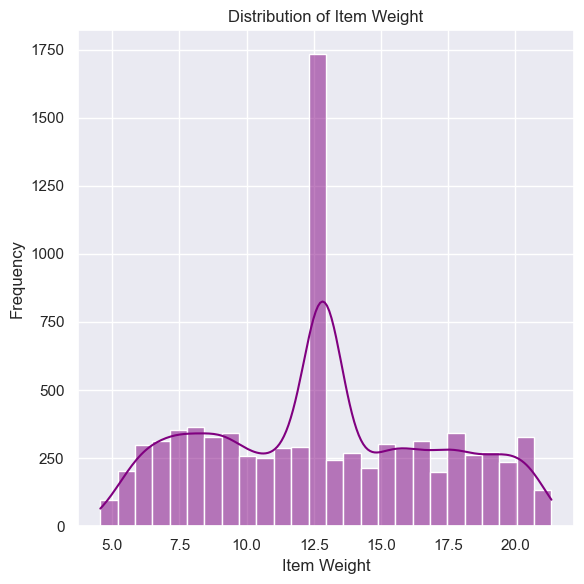

In [96]:
plt.figure(figsize=(6, 6))
sns.histplot(
    data=big_mart_data,
    x='Item_Weight',
    kde=True, color='purple',   )

plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Visibility

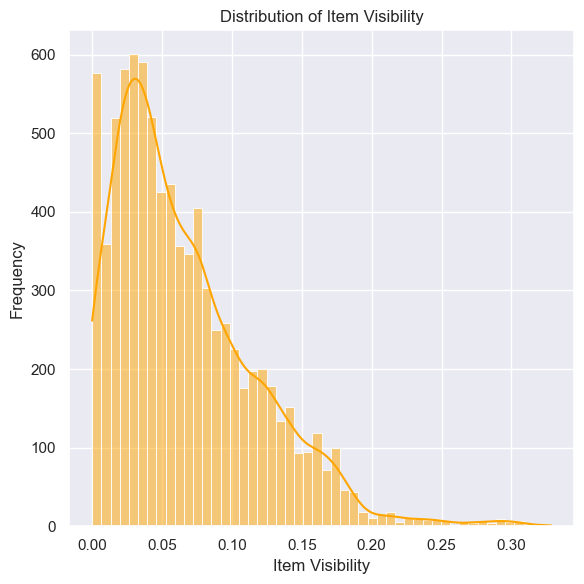

In [98]:
plt.figure(figsize=(6, 6))
sns.histplot(
    data=big_mart_data,
    x='Item_Visibility',
    kde=True,          
    color='orange',    )


plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

MRP


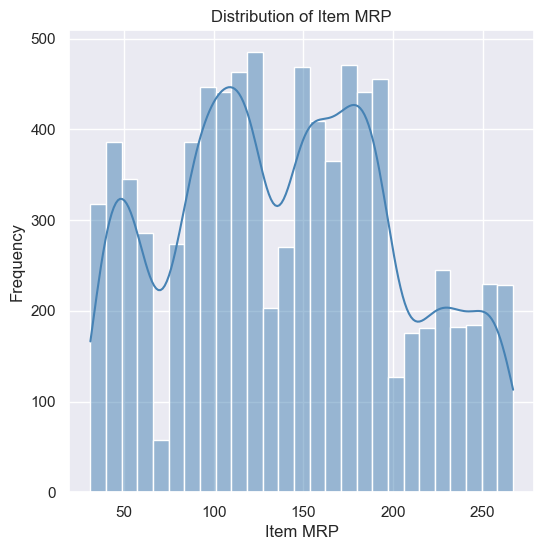

In [100]:
plt.figure(figsize=(6, 6))
sns.histplot(data=big_mart_data, x='Item_MRP', kde=True, color='steelblue')
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Frequency')
plt.show()


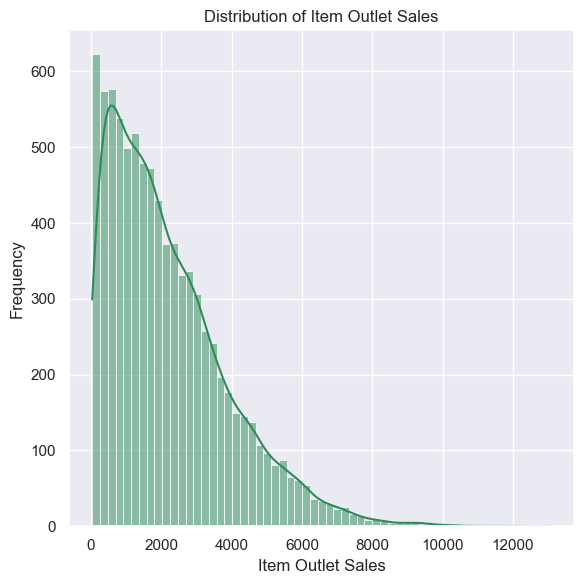

In [106]:
plt.figure(figsize=(6, 6))
sns.histplot(data=big_mart_data, x='Item_Outlet_Sales', kde=True, color='seagreen')
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

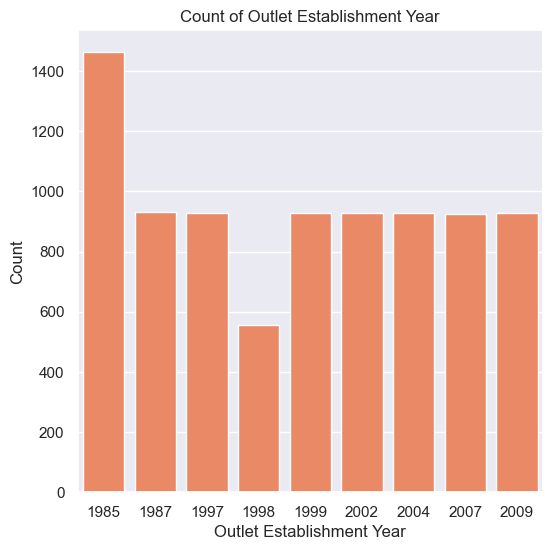

In [108]:
# Outlet_Establishment Year column
plt.figure(figsize=(6, 6))
sns.countplot(data=big_mart_data, x='Outlet_Establishment_Year', color='coral')
plt.title('Count of Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Count')
plt.show()

Categorical_Columns

Fat Content

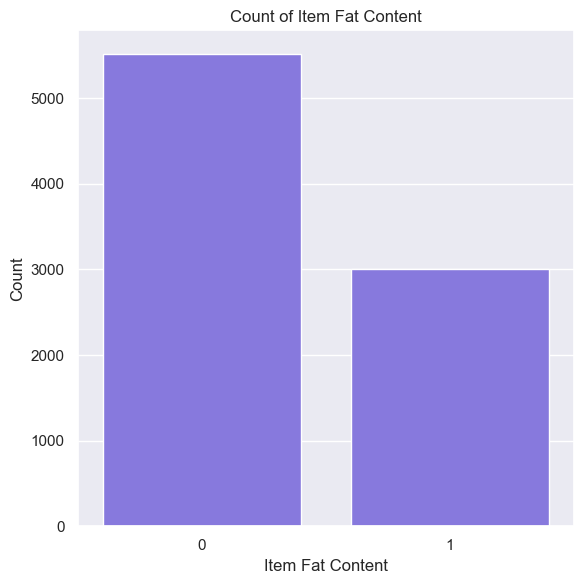

In [110]:
plt.figure(figsize=(6, 6))
sns.countplot(data=big_mart_data, x='Item_Fat_Content', color='mediumslateblue')
plt.title('Count of Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Item Type

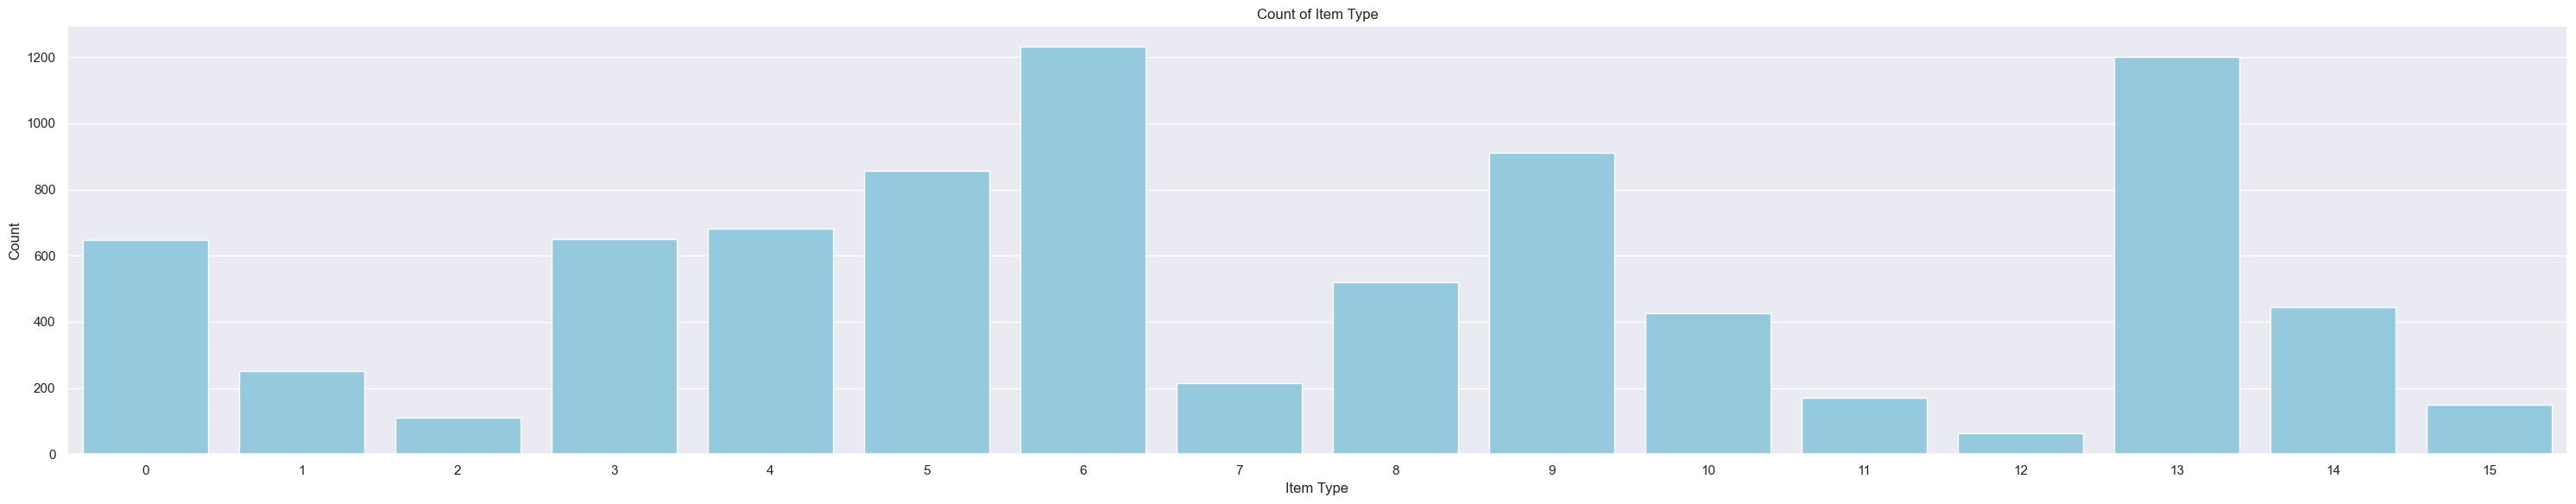

In [116]:
plt.figure(figsize=(30, 6))
sns.countplot(data=big_mart_data, x='Item_Type', color='skyblue')
plt.title('Count of Item Type')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

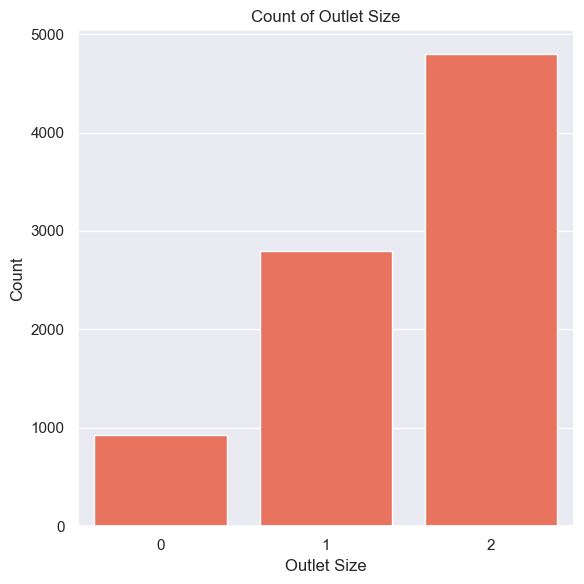

In [120]:
plt.figure(figsize=(6, 6))
sns.countplot(data=big_mart_data, x='Outlet_Size', color='tomato')
plt.title('Count of Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [38]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [39]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [40]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Lable Encoding 

In [42]:
encoder = LabelEncoder()

In [43]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [44]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [45]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [46]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [47]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [50]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso


def evaluate(model, X_test, Y_test):
    preds = model.predict(X_test)
    r2 = r2_score(Y_test, preds)
    rmse = np.sqrt(mean_squared_error(Y_test, preds))
    return r2, rmse

results = {}

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_grid = {'alpha': [0.01, 0.1, 1]}
lasso_cv = GridSearchCV(lasso, lasso_grid, cv=3, scoring='r2')
lasso_cv.fit(X_train, Y_train)
r2, rmse = evaluate(lasso_cv.best_estimator_, X_test, Y_test)
results['Lasso'] = {'Best Params': lasso_cv.best_params_, 'R2': r2, 'RMSE': rmse}

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=2)
dt_grid = {'max_depth': [5, 10]}
dt_cv = GridSearchCV(dt, dt_grid, scoring='r2', cv=3)
dt_cv.fit(X_train, Y_train)
r2, rmse = evaluate(dt_cv.best_estimator_, X_test, Y_test)
results['Decision Tree'] = {'Best Params': dt_cv.best_params_, 'R2': r2, 'RMSE': rmse}

#  Random Forest Regressor
rf = RandomForestRegressor(random_state=2)
rf_grid = {'n_estimators': [100, 200]}
rf_cv = GridSearchCV(rf, rf_grid, scoring='r2', cv=3)
rf_cv.fit(X_train, Y_train)
r2, rmse = evaluate(rf_cv.best_estimator_, X_test, Y_test)
results['Random Forest'] = {'Best Params': rf_cv.best_params_, 'R2': r2, 'RMSE': rmse}

#  XGBoost Regressor
xgb = XGBRegressor(random_state=2)
xgb_grid = {'learning_rate': [0.05, 0.1]}
xgb_cv = GridSearchCV(xgb, xgb_grid, scoring='r2', cv=3)
xgb_cv.fit(X_train, Y_train)
r2, rmse = evaluate(xgb_cv.best_estimator_, X_test, Y_test)
results['XGBoost'] = {'Best Params': xgb_cv.best_params_, 'R2': r2, 'RMSE': rmse}

# results 
for model, res in results.items():
    print(f"\n {model}")
    print(f"Best Parameters: {res['Best Params']}")
    print(f"R² Score: {res['R2']:.4f}")
    print(f"RMSE: {res['RMSE']:.2f}")



 Lasso
Best Parameters: {'alpha': 0.1}
R² Score: 0.4891
RMSE: 1255.88

 Decision Tree
Best Parameters: {'max_depth': 5}
R² Score: 0.5802
RMSE: 1138.38

 Random Forest
Best Parameters: {'n_estimators': 200}
R² Score: 0.5524
RMSE: 1175.43

 XGBoost
Best Parameters: {'learning_rate': 0.05}
R² Score: 0.5705
RMSE: 1151.51


In [51]:

final_model = DecisionTreeRegressor(max_depth=5, random_state=2)
final_model.fit(X_train, Y_train)

y_pred = final_model.predict(X_test)

r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(" Final Decision Tree Model")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


 Final Decision Tree Model
R² Score: 0.5802
RMSE: 1138.38


In [122]:
output_df = pd.DataFrame({
    'Actual_Sales': Y_test.values,
    'Predicted_Sales': y_pred
})


X_test_reset = X_test.reset_index(drop=True)
final_output = pd.concat([X_test_reset, output_df], axis=1)

final_output.to_csv("final_predictions_decision_tree.csv", index=False)
print(" Predictions saved to final_predictions_decision_tree.csv")


 Predictions saved to final_predictions_decision_tree.csv
